In [3]:
import numpy as np
from scipy.linalg import cholesky, eig

In [4]:
def CI(v, w, A):
    return np.dot(v.T, np.dot(A, w))

#Question 1 - A Matrix Problem
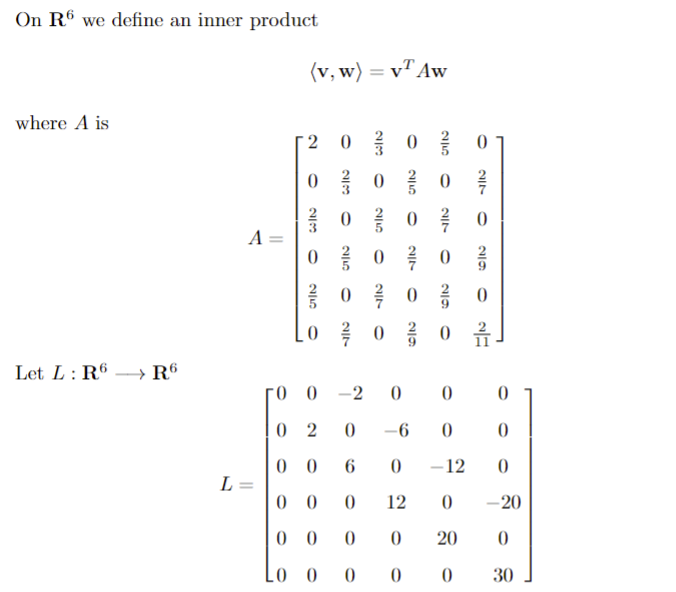

## Part 1 - Show that the eigenvectors of L are orthogonal

In [5]:
import numpy as np
from numpy.linalg import eig

# Matrices A and L from the problem statement
A = np.array([
    [2, 0, 2/3, 0, 2/5, 0],
    [0, 2/3, 0, 2/5, 0, 2/7],
    [2/3, 0, 2/5, 0, 2/7, 0],
    [0, 2/5, 0, 2/7, 0, 2/9],
    [2/5, 0, 2/7, 0, 2/9, 0],
    [0, 2/7, 0, 2/9, 0, 2/11]
])

L = np.array([
    [0, 0, -2, 0, 0, 0],
    [0, 2, 0, -6, 0, 0],
    [0, 0, 6, 0, -12, 0],
    [0, 0, 0, 12, 0, -20],
    [0, 0, 0, 0, 20, 0],
    [0, 0, 0, 0, 0, 30]
])

# Finding the eigenvalues and eigenvectors of L
eigenvalues_L, eigenvectors_L = eig(L)

# Normalize eigenvectors using the A-inner product norm
def A_norm(vec, A):
    return np.sqrt(vec.T @ A @ vec)

# Normalize each eigenvector with respect to the A-inner product
eigenvectors_L_normalized = np.array([
    eigenvectors_L[:, i] / A_norm(eigenvectors_L[:, i], A)
    for i in range(eigenvectors_L.shape[1])
]).T

# Step 1 Verification: Check orthogonality using A-defined inner product
orthogonality_check = np.dot(eigenvectors_L_normalized.T, A @ eigenvectors_L_normalized)

# Threshold function to zero out small values
def threshold_matrix(matrix, threshold=1e-10):
    return np.where(np.abs(matrix) < threshold, 0, matrix)

# Apply thresholding to the orthogonality check result
thresholded_orthogonality_check = threshold_matrix(orthogonality_check, threshold=1e-10)

# Display the thresholded result
print("Thresholded Orthogonality Check (small values set to 0):\n", thresholded_orthogonality_check)


Thresholded Orthogonality Check (small values set to 0):
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


## Part 2 Show that <Lv,W> = <v,Lw> for all v and w in R^6

In [6]:
# Random vectors v and w in R^6
v = np.random.rand(6, 1)
w = np.random.rand(6, 1)

Lv = L @ v
Lw = L @ w
# Compute both sides of the equality
inner_product_Lv_w = CI(Lv,w,A)[0,0]
inner_product_v_Lw = CI(Lw,v,A)[0,0]

print("Inner product <Lv, w>:", inner_product_Lv_w)
print("Inner product <v, Lw>:", inner_product_v_Lw)
print("Are they equal?", np.isclose(inner_product_Lv_w, inner_product_v_Lw))

Inner product <Lv, w>: 4.089254950441816
Inner product <v, Lw>: 4.089254950441818
Are they equal? True


##Part 3
##Let V be the upper triangular matrix in the cholesky decomposition of A,let P be the matrix of eigenvectors of L listed in ascending order in their eigenvalues. Compute V P . Think about what the answer here means

In [16]:
# Step 3: Computing the product VU

# Cholesky decomposition of A (A must be positive definite)
try:
    V = cholesky(A, lower=False)  # Upper triangular matrix V
except np.linalg.LinAlgError as e:
    V = None  # If Cholesky fails, A is not positive definite

# Construct the matrix P of eigenvectors sorted by eigenvalues
# Sorting eigenvectors according to eigenvalues in ascending order
sorted_indices = np.argsort(eigenvalues_L)
P = eigenvectors_L[:, sorted_indices]

# Compute VU if V is defined
VP = V @ P

thresholded_VP = threshold_matrix(VP, threshold=1e-10)

print("Upper Triangular Matrix V from Cholesky Decomposition:\n", V)
print("Matrix P (sorted eigenvectors):\n", P)
print("Product VP:\n", thresholded_VP)




Upper Triangular Matrix V from Cholesky Decomposition:
 [[1.41421356 0.         0.47140452 0.         0.28284271 0.        ]
 [0.         0.81649658 0.         0.48989795 0.         0.34992711]
 [0.         0.         0.42163702 0.         0.36140316 0.        ]
 [0.         0.         0.         0.21380899 0.         0.23756555]
 [0.         0.         0.         0.         0.1077496  0.        ]
 [0.         0.         0.         0.         0.         0.05414621]]
Matrix P (sorted eigenvectors):
 [[ 1.          0.         -0.31622777  0.          0.06494176  0.        ]
 [ 0.          1.          0.         -0.51449576  0.          0.15729459]
 [ 0.          0.          0.9486833   0.         -0.64941759  0.        ]
 [ 0.          0.          0.          0.85749293  0.         -0.73404142]
 [ 0.          0.          0.          0.          0.75765385  0.        ]
 [ 0.          0.          0.          0.          0.          0.66063728]]
Product VP:
 [[1.41421356 0.         0.      

# What does the answer mean?

The product 𝑉𝑃 being diagonal simplifies the problem at hand. The diagonal values might correspond to the scaling or the influence of certain principal components or eigenvalues, potentially highlighting dominant directions or components in the transformed space. It implies that the data associated with 𝐴 and 𝐿 are naturally separable in a coordinate system defined by 𝑉 and 𝑃.

## Part 4

##Find orthogonal projection of the vector v onto the space spanned by the first 3 eigenvectors (in ascending order), where v is

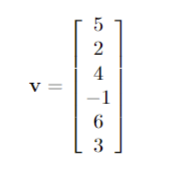

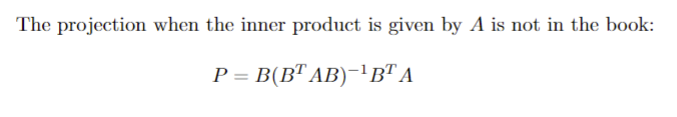

Projection formula:

In [8]:
# Step 4: Orthogonal projection of a vector v onto the space spanned by the first 3 eigenvectors
# If no specific vector is given, we generate a random example
v = [5,2,4,-1,6,3]

# First 3 eigenvectors (sorted in ascending order by eigenvalues)
B = eigenvectors_L[:, sorted_indices[:3]]

P = B @ np.linalg.inv(B.T @ A @ B) @ B.T @ A

# Project vector v onto the subspace
v_proj = P@v

print("Orthogonal projection of v onto the subspace:", v_proj)


Orthogonal projection of v onto the subspace: [4.48571429 2.68571429 9.14285714 0.         0.         0.        ]


In [9]:
!pip install sympy

#Problem 2 - A calculus problem

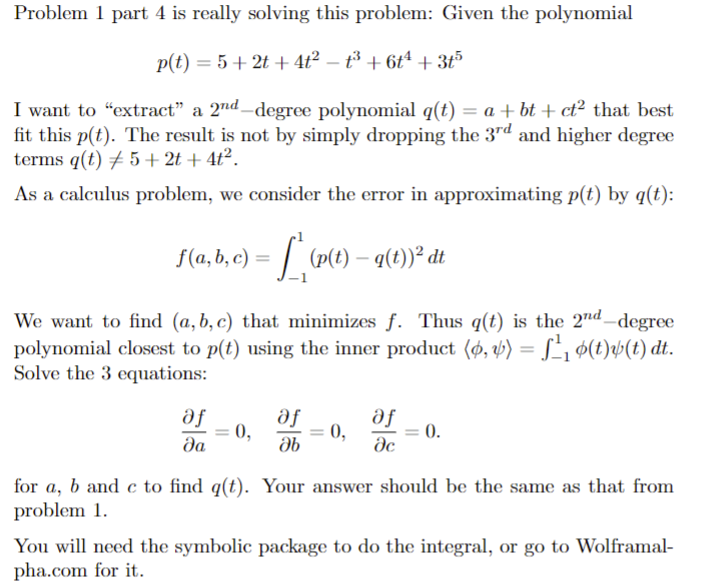

In [10]:
import sympy as sp

# Define the symbols
a, b, c, t = sp.symbols('a b c t')

# Define the polynomials
p_t = 5 + 2*t + 4*t**2 - t**3 + 6*t**4 + 3*t**5  # Given polynomial p(t)
q_t = a + b*t + c*t**2                           # Second-degree polynomial q(t)

# Define the error function f(a, b, c)
error_function = sp.integrate((p_t - q_t)**2, (t, -1, 1))

# Compute partial derivatives
partial_a = sp.diff(error_function, a)
partial_b = sp.diff(error_function, b)
partial_c = sp.diff(error_function, c)

# Solve the system of equations
solution = sp.solve([partial_a, partial_b, partial_c], (a, b, c))

# Display the solution
print("The coefficients that minimize the error are:")
print(f"a = {solution[a]}")
print(f"b = {solution[b]}")
print(f"c = {solution[c]}")

The coefficients that minimize the error are:
a = 157/35
b = 94/35
c = 64/7
